In [79]:
import six

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian_kmers', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-24 15:38:34	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers/datapackage.json
2016-02-24 15:38:34	Parsing datapackage to create a Study object
2016-02-24 15:39:19	Initializing Study
2016-02-24 15:39:19	Initializing Predictor configuration manager for Study
2016-02-24 15:39:19	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-24 15:39:19	Added ExtraTreesClassifier to default predictors
2016-02-24 15:39:19	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-24 15:39:19	Added ExtraTreesRegressor to default predictors
2016-02-24 15:39:19	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-24 15:39:19	Added GradientBoostingClassifier to default predictors
2016-02-24 15:39:19	Predictor GradientBoostingRegressor is of type <class 'sk

In [2]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [3]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
!mkdir $folder

figure_folder = '{}/kmer_counting'.format(folder)
! mkdir -p $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian': File exists


## Plot kmer zscore clustering

In [4]:
from anchor import MODALITY_ORDER, MODALITY_TO_COLOR

In [5]:
study.supplemental.kmer_zscores.head()

,upstream400nt_MN_ambivalent_placental,downstream400nt_MN_ambivalent_placental,upstream400nt_MN_bimodal_placental,downstream400nt_MN_bimodal_placental,upstream400nt_MN_excluded_placental,downstream400nt_MN_excluded_placental,upstream400nt_MN_included_placental,downstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_ambivalent_placental,...,upstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,downstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,downstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental,downstream400nt_iPSC_included_placental
AAAA,0.489545,-0.236406,0.204280,0.128076,0.181630,0.106291,-0.086277,-0.053046,0.043527,1.012095,...,0.251261,0.476465,0.089640,0.021999,0.265499,-0.243739,0.186107,0.164391,-0.072578,-0.050104
AAAC,-0.247072,-0.239855,0.177264,0.042725,0.178739,0.152397,-0.078822,-0.044437,0.332311,0.302981,...,0.313133,0.113274,0.052135,0.005388,-0.237672,-0.234780,0.162938,0.170825,-0.056465,-0.042953
AAAG,0.274411,-0.063248,0.122519,0.075607,0.194019,0.104546,-0.071031,-0.041272,0.163492,2.193816,...,0.348537,0.271058,0.032222,0.006604,0.501144,-0.289255,0.183641,0.155779,-0.056134,-0.041388
AAAT,-0.300357,-0.302370,0.209059,0.146095,0.284080,0.151942,-0.109580,-0.067557,0.443403,1.091756,...,0.320445,0.489074,0.121255,0.035159,0.338326,-0.293312,0.225613,0.199506,-0.091791,-0.062336
AACA,-0.284725,-0.260475,0.133238,0.002742,0.123122,0.180591,-0.056575,-0.041883,0.814693,0.779935,...,0.260694,0.228592,0.052793,-0.020971,-0.256342,-0.246222,0.114197,0.183231,-0.044622,-0.039402


In [75]:
ambivalent_concurrent_cols = [x for x in study.supplemental.kmer_zscores.columns if 'concurrent' in x or 'ambivalent' in x]

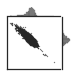

In [6]:
g = sns.jointplot('downstream400nt_iPSC_included_placental', 'downstream400nt_iPSC_excluded_placental', 
                  study.supplemental.kmer_zscores, size=2.5, color='#262626', stat_func=None,
                  joint_kws=dict(alpha=0.5, s=1, rasterized=True))
g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
g.savefig('{}/example_correlation_negative.pdf'.format(figure_folder), dpi=600)

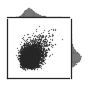

In [7]:
g = sns.jointplot('upstream400nt_iPSC_bimodal_placental', 'upstream400nt_iPSC_excluded_placental', 
                  study.supplemental.kmer_zscores, size=2.5, color='#262626', stat_func=None,
                  joint_kws=dict(alpha=0.5, s=1, rasterized=True))
g.ax_joint.set(xlabel='', xticks=[], ylabel='', yticks=[]);
g.savefig('{}/example_correlation_positive.pdf'.format(figure_folder), dpi=600)

In [8]:
sns.set(style='ticks', context='paper')

In [9]:
study.supplemental.kmer_zscores.min()

upstream400nt_MN_ambivalent_placental       -0.398581
downstream400nt_MN_ambivalent_placental     -0.539293
upstream400nt_MN_bimodal_placental          -0.084725
downstream400nt_MN_bimodal_placental        -0.095706
upstream400nt_MN_excluded_placental         -0.090115
downstream400nt_MN_excluded_placental       -0.195006
upstream400nt_MN_included_placental         -0.109580
downstream400nt_MN_included_placental       -0.098561
upstream400nt_NPC_ambivalent_placental      -0.350134
downstream400nt_NPC_ambivalent_placental    -0.426146
upstream400nt_NPC_bimodal_placental         -0.071531
downstream400nt_NPC_bimodal_placental       -0.088979
upstream400nt_NPC_excluded_placental        -0.060488
downstream400nt_NPC_excluded_placental      -0.221346
upstream400nt_NPC_included_placental        -0.096614
downstream400nt_NPC_included_placental      -0.087538
upstream400nt_iPSC_ambivalent_placental     -0.175557
downstream400nt_iPSC_ambivalent_placental   -0.235292
upstream400nt_iPSC_bimodal_p

In [80]:
cutoff = study.supplemental.kmer_zscores.mean() + 2*study.supplemental.kmer_zscores.std()

zscores_filtered = study.supplemental.kmer_zscores[study.supplemental.kmer_zscores > cutoff].dropna(how='all')
six.print_(zscores_filtered.shape)
zscores_filtered

(2059, 26)


,upstream400nt_MN_ambivalent_placental,downstream400nt_MN_ambivalent_placental,upstream400nt_MN_bimodal_placental,downstream400nt_MN_bimodal_placental,upstream400nt_MN_excluded_placental,downstream400nt_MN_excluded_placental,upstream400nt_MN_included_placental,downstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_ambivalent_placental,...,upstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,downstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,downstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental,downstream400nt_iPSC_included_placental
AAAA,NaN,NaN,0.204280,0.128076,0.181630,NaN,NaN,NaN,NaN,NaN,...,NaN,0.476465,0.089640,NaN,NaN,NaN,0.186107,0.164391,NaN,NaN
AAAC,NaN,NaN,0.177264,NaN,0.178739,0.152397,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.162938,0.170825,NaN,NaN
AAAG,NaN,NaN,NaN,NaN,0.194019,NaN,NaN,NaN,NaN,2.193816,...,NaN,NaN,NaN,NaN,NaN,NaN,0.183641,0.155779,NaN,NaN
AAAT,NaN,NaN,0.209059,0.146095,0.284080,0.151942,NaN,NaN,NaN,NaN,...,NaN,0.489074,0.121255,NaN,NaN,NaN,0.225613,0.199506,NaN,NaN
AACA,NaN,NaN,NaN,NaN,NaN,0.180591,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183231,NaN,NaN
AACT,NaN,NaN,0.187972,NaN,NaN,0.181823,NaN,NaN,1.389497,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.176301,0.157146,NaN,NaN
AAGA,1.681436,NaN,NaN,NaN,0.208655,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.178663,NaN,NaN,NaN
AAGC,NaN,NaN,NaN,NaN,0.184207,NaN,NaN,NaN,NaN,1.941779,...,NaN,NaN,NaN,NaN,NaN,NaN,0.196049,NaN,NaN,NaN
AAGT,NaN,NaN,NaN,NaN,0.199170,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.188738,NaN,NaN,NaN
AATA,NaN,NaN,0.195471,NaN,0.191518,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.079779,NaN,NaN,NaN,0.153150,0.174418,NaN,NaN


In [81]:
ambivalent_concurrent_zscores = zscores_filtered[ambivalent_concurrent_cols].dropna(how='all')
ambivalent_concurrent_zscores

,upstream400nt_MN_ambivalent_placental,downstream400nt_MN_ambivalent_placental,upstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_ambivalent_placental,upstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_concurrent_placental,downstream400nt_iPSC_concurrent_placental
AAAA,NaN,NaN,NaN,NaN,NaN,0.476465,NaN,NaN
AAAG,NaN,NaN,NaN,2.193816,NaN,NaN,NaN,NaN
AAAT,NaN,NaN,NaN,NaN,NaN,0.489074,NaN,NaN
AACT,NaN,NaN,1.389497,NaN,NaN,NaN,NaN,NaN
AAGA,1.681436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAGC,NaN,NaN,NaN,1.941779,NaN,NaN,NaN,NaN
AATC,NaN,NaN,NaN,NaN,NaN,NaN,1.014120,NaN
AATG,NaN,NaN,NaN,1.578510,NaN,0.390021,NaN,NaN
AATT,NaN,NaN,0.872632,NaN,NaN,NaN,NaN,NaN
ACCA,NaN,NaN,NaN,NaN,NaN,0.422806,NaN,NaN


In [87]:
sns.set(context='paper', style='ticks')

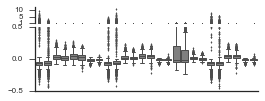

In [88]:
fig, axes = plt.subplots(nrows=2, figsize=(4, 1.5), gridspec_kw=dict(height_ratios=(0.2, 0.8), hspace=0.1))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

ax = axes[0]
sns.boxplot(study.supplemental.kmer_zscores, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(1, 12), yticks=[1, 5, 10])
sns.despine(ax=ax, bottom=True)

ax=axes[1]
sns.boxplot(study.supplemental.kmer_zscores, ax=ax, **kwargs)
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-0.5, .5))

# plt.setp(ax.get_xticklabels(), rotation=90);
sns.despine(ax=ax)
ax.locator_params(nbins=3, axis='y')
# fig.tight_layout()
fig.savefig('{}/kmer_zscores_boxplot.pdf'.format(figure_folder))

In [11]:
sns.set(context='paper', style='whitegrid')
columns = study.supplemental.kmer_zscores.columns

direction_to_color = {'upstream': '#F2F2F2', # 95% white out of black
                      'downstream': '#262626' # 15% white out of black
                     }

phenotype_colors = columns.map(lambda x: study.phenotype_to_color[x.split('_')[1]])
modality_colors = columns.map(lambda x: MODALITY_TO_COLOR[x.split('_')[2]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [modality_colors, direction_colors, phenotype_colors]

In [12]:
# sns.clustermap(study.supplemental.kmer_zscores)

In [13]:
kmer_corr = study.supplemental.kmer_zscores.corr()

In [14]:
cmap = 'RdBu_r' #sns.diverging_palette(220, 0, as_cmap=True)

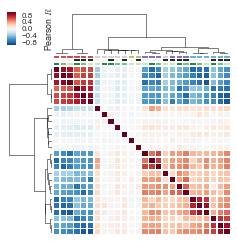

In [15]:
g = sns.clustermap(kmer_corr, col_colors=intron_colors, method='ward', 
                   cbar_kws=dict(label='Pearson $R$'), vmin=-1, vmax=1,
                   linewidth=0.5, figsize=(4, 4), cmap=cmap)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/kmer_zscore_pearson_correlation_clustermap.pdf'.format(figure_folder))

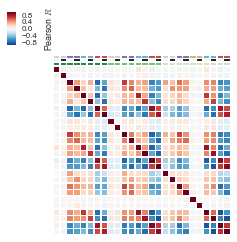

In [16]:
g = sns.clustermap(kmer_corr, col_colors=intron_colors, method='ward', 
                   cbar_kws=dict(label='Pearson $R$'), vmin=-1, vmax=1,
                   linewidth=0.5, figsize=(4, 4), cmap=cmap, col_cluster=False, row_cluster=False)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/kmer_zscore_pearson_correlation_clustermap_no_clustering.pdf'.format(figure_folder))

## Match known motifs to kmers

In [17]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

# cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [18]:
ls $cisbp_folder/*csv

/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_kvector_456.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_motif_metadata.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/kmers_in_cisbp_motifs_thresh05.csv


In [19]:
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


In [20]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split()[0].split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,None,None,None,None,None,None,None,None,None,None


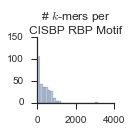

In [21]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 2))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=3)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax), title='# $k$-mers per\nCISBP RBP Motif')
sns.despine()
fig.tight_layout()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [22]:
kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

M255_0.6_PUM1_ENSG00000134644_Homo_sapiens    3153
dtype: int64

In [23]:
from scipy.stats import ttest_1samp
kmer_means = study.supplemental.kmer_zscores.mean()

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
        x = intron_col[cisbp_kmer]
        y = intron_col
#         sign = np.sign(x.median() - y.median())
#         statistic, p_value = mannwhitneyu(x, y)
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_utest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif long', 'T-Statistic', '$p$-value',])
print kmer_cisbp_utest_tidy.shape
kmer_cisbp_utest_tidy.head()

(7722, 4)


,Intron,RBP Motif long,T-Statistic,$p$-value
0,upstream400nt_MN_ambivalent_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-9.992333,2.154197e-10
1,upstream400nt_MN_ambivalent_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-4.186015,9.267874e-05
2,upstream400nt_MN_ambivalent_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-0.555699,5.792847e-01
3,upstream400nt_MN_ambivalent_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,1.102617,2.707158e-01
4,upstream400nt_MN_ambivalent_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-6.257689,8.689845e-08


In [24]:
sns.set(style='ticks', context='talk')

In [25]:
cisbp_metadata.loc[cisbp_metadata['RBP Name'] == 'MBNL3']

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M037_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M037,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M320_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M320,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None


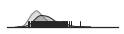

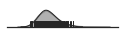

In [26]:
rbp_name = 'MBNL3'

cisbp_ids = cisbp_metadata.loc[cisbp_metadata['RBP Name'] == rbp_name].index
for cisbp_id in cisbp_ids:
    x = study.supplemental.kmer_zscores['upstream400nt_iPSC_bimodal_placental']
    y = x[cisbp_kmers[cisbp_id]]

    fig, ax = plt.subplots(figsize=(2, .75))

    bins = np.linspace(x.min(), x.max(), 50)
    sns.distplot(x, kde=True, hist=False, label='iPSC bimodal upstream', bins=bins, 
                 color='grey', kde_kws=dict(shade=True, linewidth=1))
    sns.distplot(y, kde=True, hist=False, label=rbp_name, bins=bins, rug=True, rug_kws=dict(height=0.3),
                 kde_kws=dict(shade=True, linewidth=1), color='#262626')
    ax.locator_params(nbins=4)
    ax.legend(loc='best', fontsize=10)
    sns.despine(left=True)
    ax.legend_.set_visible(False)
    ax.set(xlabel='', xticks=[], yticks=[])
    fig.tight_layout()
    fig.savefig('{}/distplot_{}_vs_ipsc_bimodal_upstream.pdf'.format(figure_folder, cisbp_id))
# ymin, ymax = ax.get_ylim()
# ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [27]:
kmer_cisbp_utest_tidy['RBP Motif'] = kmer_cisbp_utest_tidy['RBP Motif long'].str.split().str.get(0)
kmer_cisbp_utest_tidy.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,RBP Motif
0,upstream400nt_MN_ambivalent_placental,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-9.992333,2.154197e-10,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,upstream400nt_MN_ambivalent_placental,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-4.186015,9.267874e-05,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
2,upstream400nt_MN_ambivalent_placental,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-0.555699,5.792847e-01,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...
3,upstream400nt_MN_ambivalent_placental,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,1.102617,2.707158e-01,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
4,upstream400nt_MN_ambivalent_placental,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-6.257689,8.689845e-08,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans


In [28]:
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


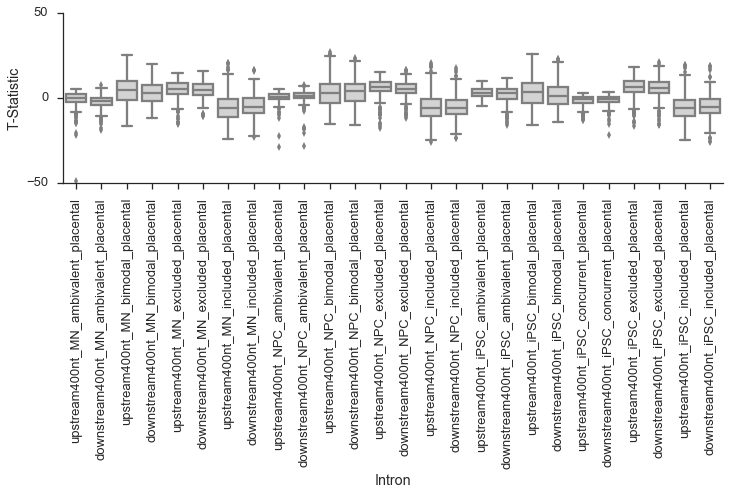

In [29]:
fig, ax = plt.subplots()
sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, color='lightgrey')
plt.setp(ax.get_xticklabels(), rotation=90);
sns.despine()
ax.locator_params(nbins=4, axis='y')
fig.tight_layout()
fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

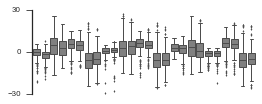

In [89]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

In [30]:
t_statistic = kmer_cisbp_utest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
print t_statistic.shape
t_statistic.head()

(297, 26)


Intron,downstream400nt_MN_ambivalent_placental,downstream400nt_MN_bimodal_placental,downstream400nt_MN_excluded_placental,downstream400nt_MN_included_placental,downstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_excluded_placental,downstream400nt_NPC_included_placental,downstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_bimodal_placental,...,upstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_excluded_placental,upstream400nt_NPC_included_placental,upstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-6.301912,7.132713,5.574686,-7.540995,2.563695,6.460159,4.475827,-6.205910,3.116465,6.455625,...,-8.912393,1.837247,7.472422,8.526430,-9.495969,1.966469,10.008718,0.256513,8.695416,-9.764186
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.355543,-9.802666,-2.832283,8.516482,-0.680243,-11.311773,-3.725765,9.104858,-11.343988,-7.651283,...,5.786565,-8.546683,-9.297200,-2.350406,7.430305,-0.005187,-5.972303,-0.210936,-3.800231,7.724187
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,-3.088989,7.716080,6.368565,-8.484975,-1.087367,7.628610,7.398092,-8.519522,6.542999,7.383687,...,-8.555538,4.328583,8.794936,6.458524,-9.625120,3.706396,6.042721,-11.815686,8.405205,-8.420685
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.345714,9.451400,5.111001,-8.910242,-2.443040,7.244022,7.138280,-8.202173,6.289994,10.177284,...,-9.908560,2.901036,10.572853,8.172687,-11.022371,4.663915,6.438372,-10.047724,9.640772,-9.509076
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-1.485799,14.622261,14.591893,-17.696506,1.257089,18.823912,13.550445,-18.029784,8.707627,16.052289,...,-17.276760,2.306415,17.909746,9.133566,-16.153473,7.947351,19.094524,-1.263561,11.039707,-16.528900


In [31]:
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
t_statistic_homo_sapiens.head()

(172, 26)


Intron,downstream400nt_MN_ambivalent_placental,downstream400nt_MN_bimodal_placental,downstream400nt_MN_excluded_placental,downstream400nt_MN_included_placental,downstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_excluded_placental,downstream400nt_NPC_included_placental,downstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_bimodal_placental,...,upstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_excluded_placental,upstream400nt_NPC_included_placental,upstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-6.301912,7.132713,5.574686,-7.540995,2.563695,6.460159,4.475827,-6.205910,3.116465,6.455625,...,-8.912393,1.837247,7.472422,8.526430,-9.495969,1.966469,10.008718,0.256513,8.695416,-9.764186
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.355543,-9.802666,-2.832283,8.516482,-0.680243,-11.311773,-3.725765,9.104858,-11.343988,-7.651283,...,5.786565,-8.546683,-9.297200,-2.350406,7.430305,-0.005187,-5.972303,-0.210936,-3.800231,7.724187
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.345714,9.451400,5.111001,-8.910242,-2.443040,7.244022,7.138280,-8.202173,6.289994,10.177284,...,-9.908560,2.901036,10.572853,8.172687,-11.022371,4.663915,6.438372,-10.047724,9.640772,-9.509076
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,-1.080368,12.642153,12.150173,-14.771625,2.751140,16.544029,12.542579,-16.885597,7.362834,15.349852,...,-16.066707,2.396159,17.448604,11.664786,-17.711148,7.080762,16.480593,0.826900,14.393418,-17.701067
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,-3.640399,4.340038,4.387707,-5.760560,3.038955,3.362717,4.554050,-5.183807,4.821388,0.069101,...,-8.146907,0.670864,3.743583,10.275993,-9.158064,5.583549,0.791061,-1.413454,9.660134,-7.863278


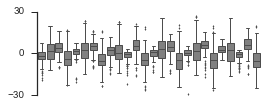

In [60]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(t_statistic_homo_sapiens, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_homo_sapiens_boxplots.pdf'.format(figure_folder))

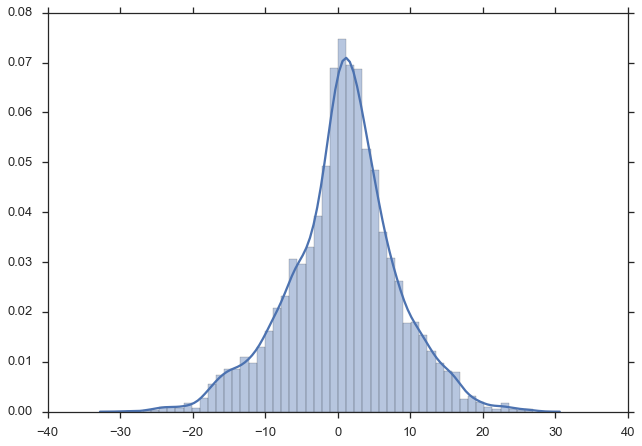

In [32]:
sns.distplot(t_statistic_homo_sapiens.values.flat)

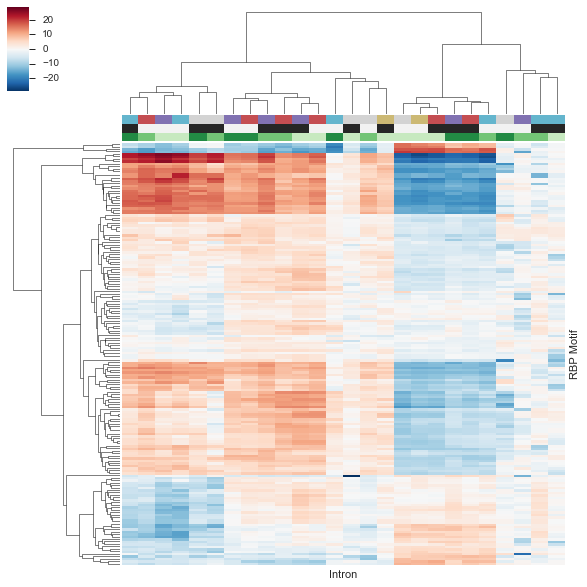

In [62]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_clustermap.pdf'.format(figure_folder))

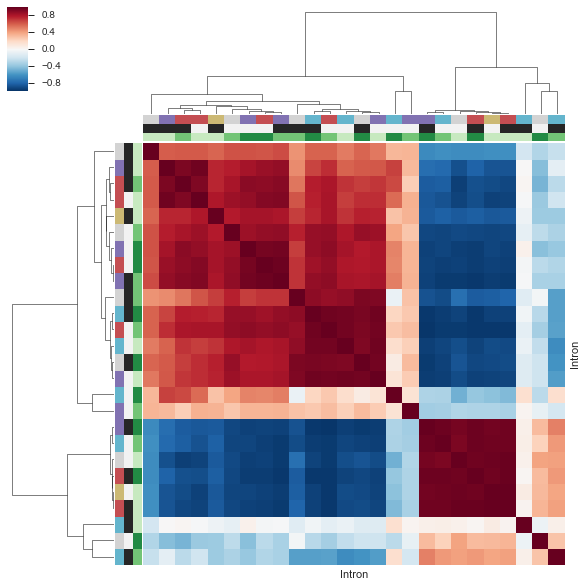

In [63]:
g = sns.clustermap(t_statistic_homo_sapiens.corr(), row_colors=intron_colors, col_colors=intron_colors)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_correlated_clustermap.pdf'.format(figure_folder))

In [82]:
cutoff = t_statistic_homo_sapiens.mean() + 2*t_statistic_homo_sapiens.std()

t_statistic_filtered = t_statistic_homo_sapiens[t_statistic_homo_sapiens >=  cutoff]
t_statistic_filtered = t_statistic_filtered.dropna(how='all')
# mask = t_statistic_filtered.isnull()
# t_statistic_filtered = t_statistic_filtered.fillna(0)
print t_statistic_filtered.shape
t_statistic_filtered.head()

(15, 26)


Intron,downstream400nt_MN_ambivalent_placental,downstream400nt_MN_bimodal_placental,downstream400nt_MN_excluded_placental,downstream400nt_MN_included_placental,downstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_excluded_placental,downstream400nt_NPC_included_placental,downstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_bimodal_placental,...,upstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_excluded_placental,upstream400nt_NPC_included_placental,upstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M025_0.6_HNRNPC_ENSG00000092199_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.66055,NaN,NaN,NaN
M043_0.6_PCBP2_ENSG00000197111_Homo_sapiens,7.513084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M044_0.6_PPRC1_ENSG00000148840_Homo_sapiens,NaN,NaN,NaN,16.559506,NaN,NaN,NaN,15.548889,NaN,NaN,...,18.378333,NaN,NaN,NaN,18.420575,NaN,NaN,NaN,NaN,18.947215
M050_0.6_RBM4B_ENSG00000173914_Homo_sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.920384,NaN,NaN,...,16.192857,NaN,NaN,NaN,14.412492,NaN,NaN,NaN,NaN,13.338333
M054_0.6_RBM8A_ENSG00000131795_Homo_sapiens,NaN,NaN,NaN,16.092173,NaN,NaN,NaN,16.414364,NaN,NaN,...,20.591283,NaN,NaN,NaN,19.329918,NaN,NaN,NaN,NaN,19.394002


In [83]:

ambivalent_concurrent_t_statistic = t_statistic_filtered.loc[:, ambivalent_concurrent_cols].dropna(how='all')
ambivalent_concurrent_t_statistic.head()

Intron,upstream400nt_MN_ambivalent_placental,downstream400nt_MN_ambivalent_placental,upstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_ambivalent_placental,upstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_concurrent_placental,downstream400nt_iPSC_concurrent_placental
RBP Motif,,,,,,,,
M043_0.6_PCBP2_ENSG00000197111_Homo_sapiens,NaN,7.513084,NaN,NaN,NaN,NaN,NaN,NaN
M055_0.6_RBMS3_ENSG00000144642_Homo_sapiens,NaN,NaN,NaN,NaN,10.054307,NaN,NaN,NaN


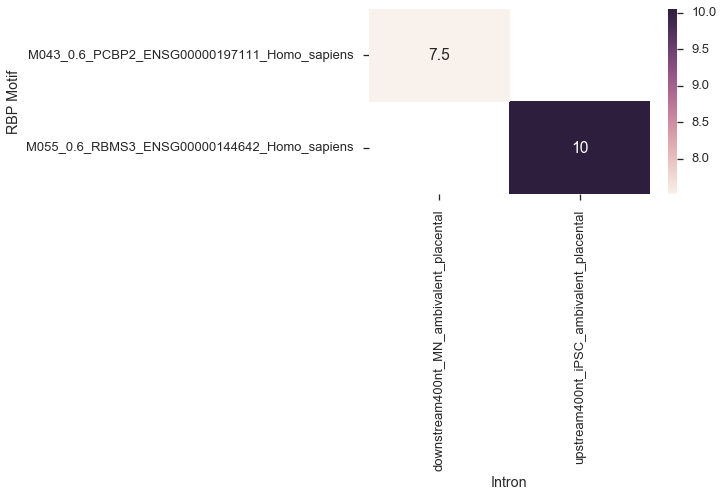

In [94]:
sns.set(context='talk', style='ticks')
fig, ax = plt.subplots()
sns.heatmap(ambivalent_concurrent_t_statistic.dropna(how='all', axis=1), annot=True)
plt.setp(ax.get_xticklabels(), rotation=90);
fig.tight_layout()

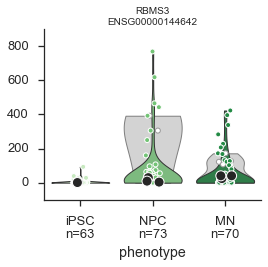

In [95]:
study.plot_gene('RBMS3')

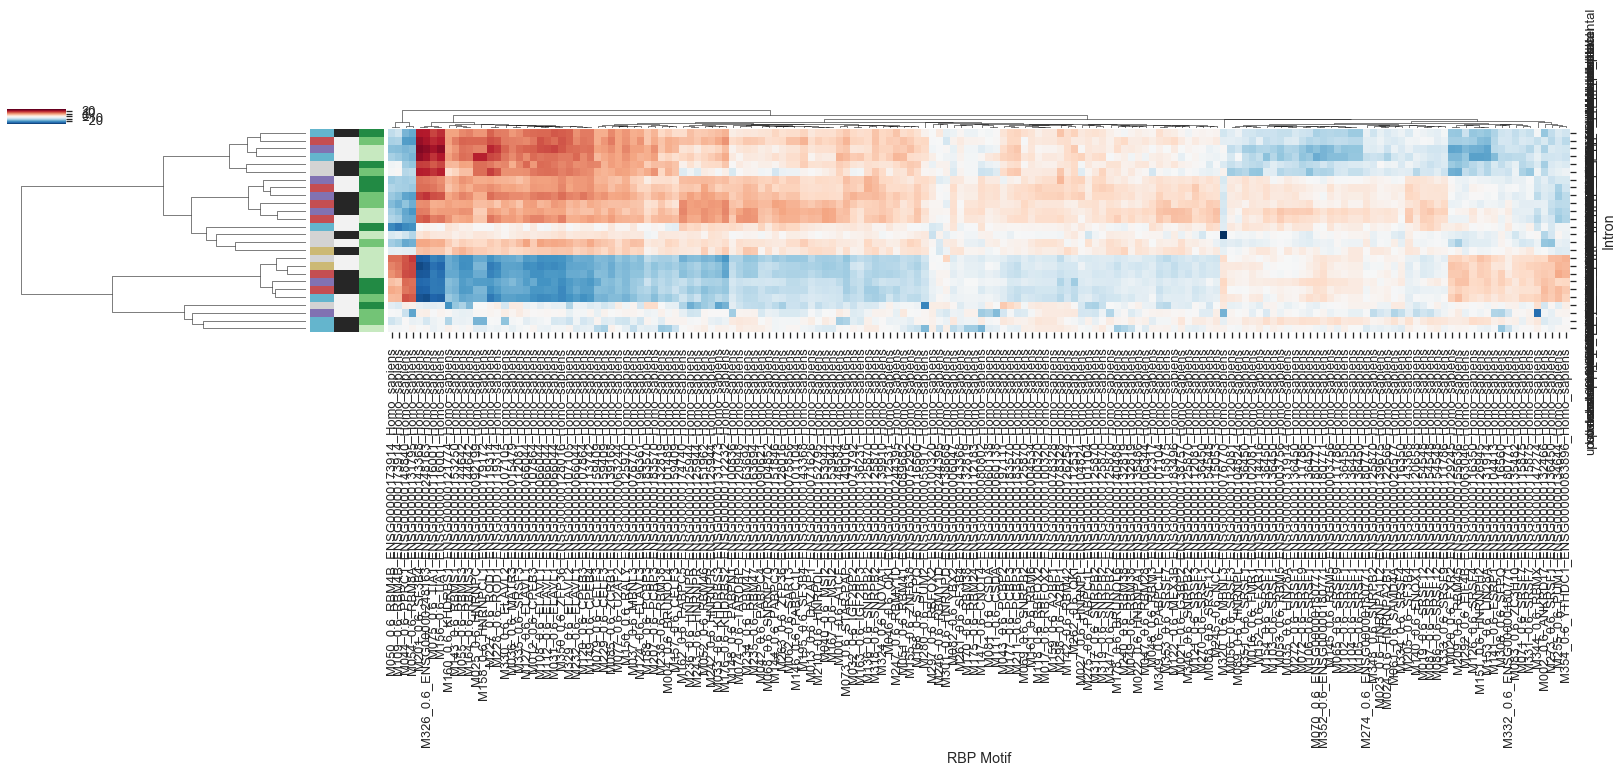

In [35]:
g = sns.clustermap(t_statistic_filtered.T, figsize=(28, 4), row_colors=intron_colors)
g.savefig('{}/intron_kmers_vs_cisbp_t_statistic_filtered_transposed.pdf'.format(figure_folder))

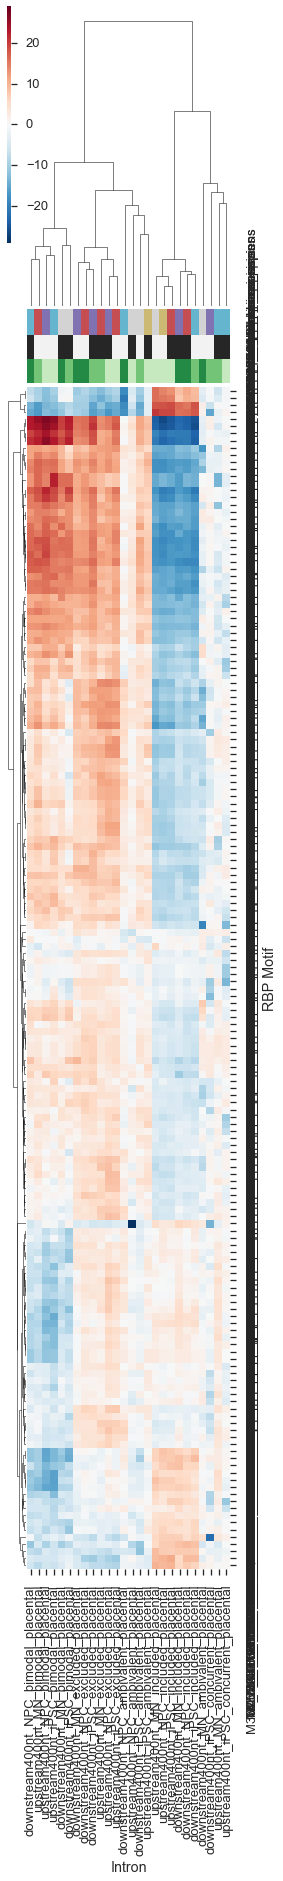

In [36]:
g = sns.clustermap(t_statistic_filtered, figsize=(4, 28), col_colors=intron_colors)
g.savefig('{}/intron_kmers_vs_cisbp_u_statistic_filtered.pdf'.format(figure_folder))

## PCA of CISBP kmers

In [37]:
from sklearn.decomposition import PCA

In [38]:
t_statistic_homo_sapiens.head()

Intron,downstream400nt_MN_ambivalent_placental,downstream400nt_MN_bimodal_placental,downstream400nt_MN_excluded_placental,downstream400nt_MN_included_placental,downstream400nt_NPC_ambivalent_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_excluded_placental,downstream400nt_NPC_included_placental,downstream400nt_iPSC_ambivalent_placental,downstream400nt_iPSC_bimodal_placental,...,upstream400nt_MN_included_placental,upstream400nt_NPC_ambivalent_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_excluded_placental,upstream400nt_NPC_included_placental,upstream400nt_iPSC_ambivalent_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_concurrent_placental,upstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental
RBP Motif,,,,,,,,,,,,,,,,,,,,,
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-6.301912,7.132713,5.574686,-7.540995,2.563695,6.460159,4.475827,-6.205910,3.116465,6.455625,...,-8.912393,1.837247,7.472422,8.526430,-9.495969,1.966469,10.008718,0.256513,8.695416,-9.764186
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-5.355543,-9.802666,-2.832283,8.516482,-0.680243,-11.311773,-3.725765,9.104858,-11.343988,-7.651283,...,5.786565,-8.546683,-9.297200,-2.350406,7.430305,-0.005187,-5.972303,-0.210936,-3.800231,7.724187
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.345714,9.451400,5.111001,-8.910242,-2.443040,7.244022,7.138280,-8.202173,6.289994,10.177284,...,-9.908560,2.901036,10.572853,8.172687,-11.022371,4.663915,6.438372,-10.047724,9.640772,-9.509076
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,-1.080368,12.642153,12.150173,-14.771625,2.751140,16.544029,12.542579,-16.885597,7.362834,15.349852,...,-16.066707,2.396159,17.448604,11.664786,-17.711148,7.080762,16.480593,0.826900,14.393418,-17.701067
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,-3.640399,4.340038,4.387707,-5.760560,3.038955,3.362717,4.554050,-5.183807,4.821388,0.069101,...,-8.146907,0.670864,3.743583,10.275993,-9.158064,5.583549,0.791061,-1.413454,9.660134,-7.863278


In [39]:
excluded_bimodal_included_cols = [x for x in t_statistic_homo_sapiens.columns if 'bimodal' in x or 'included' in x or 'excluded' in x]
excluded_bimodal_included_cols

['downstream400nt_MN_bimodal_placental',
 'downstream400nt_MN_excluded_placental',
 'downstream400nt_MN_included_placental',
 'downstream400nt_NPC_bimodal_placental',
 'downstream400nt_NPC_excluded_placental',
 'downstream400nt_NPC_included_placental',
 'downstream400nt_iPSC_bimodal_placental',
 'downstream400nt_iPSC_excluded_placental',
 'downstream400nt_iPSC_included_placental',
 'upstream400nt_MN_bimodal_placental',
 'upstream400nt_MN_excluded_placental',
 'upstream400nt_MN_included_placental',
 'upstream400nt_NPC_bimodal_placental',
 'upstream400nt_NPC_excluded_placental',
 'upstream400nt_NPC_included_placental',
 'upstream400nt_iPSC_bimodal_placental',
 'upstream400nt_iPSC_excluded_placental',
 'upstream400nt_iPSC_included_placental']

In [40]:
t_statistic_excluded_bimodal_included = t_statistic_homo_sapiens[excluded_bimodal_included_cols]

In [41]:
data = t_statistic_excluded_bimodal_included

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

(172, 2)


,component_0,component_1
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-14.881504,3.194000
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,44.616462,4.845401
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-20.641745,4.380423
M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,-47.979855,1.756713
M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,-5.692454,-5.109735


In [42]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

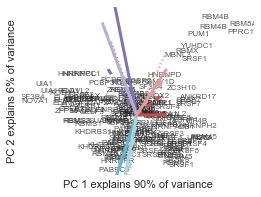

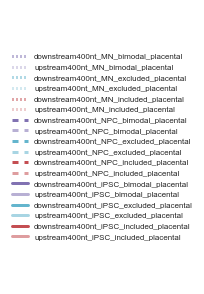

In [43]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))

# ax.set(xlabel='', ylabel='')
# quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
#              'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
#              'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
#              'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}.pdf'.format(utest_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


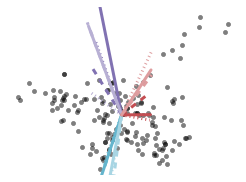

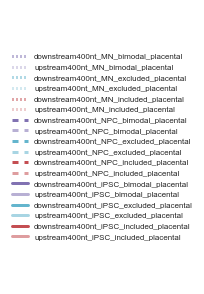

In [44]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)
# for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
#     ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
#             verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca_points.pdf'.format(figure_folder))

ax.set(xlabel='', ylabel='')
quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
             'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
             'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
             'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}_points.pdf'.format(figure_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [45]:
import matplotlib as mpl

In [52]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (t-Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-ttest-enrichment-modality-kmers-v2')

In [47]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/kmer_counting'

In [48]:
ax.get_xlim()

(-84.531647315091632, 86.747844157395647)

In [49]:
reduced.apply(np.linalg.norm, axis=1).max()

82.570543803653734

In [50]:
components

Intron,downstream400nt_MN_bimodal_placental,downstream400nt_MN_excluded_placental,downstream400nt_MN_included_placental,downstream400nt_NPC_bimodal_placental,downstream400nt_NPC_excluded_placental,downstream400nt_NPC_included_placental,downstream400nt_iPSC_bimodal_placental,downstream400nt_iPSC_excluded_placental,downstream400nt_iPSC_included_placental,upstream400nt_MN_bimodal_placental,upstream400nt_MN_excluded_placental,upstream400nt_MN_included_placental,upstream400nt_NPC_bimodal_placental,upstream400nt_NPC_excluded_placental,upstream400nt_NPC_included_placental,upstream400nt_iPSC_bimodal_placental,upstream400nt_iPSC_excluded_placental,upstream400nt_iPSC_included_placental
0,-0.233775,-0.158248,0.250871,-0.264335,-0.153607,0.244355,-0.234341,-0.195647,0.256646,-0.282175,-0.152744,0.263238,-0.307994,-0.142885,0.268409,-0.297038,-0.168867,0.262332
1,0.238903,-0.161230,-0.016880,0.153395,-0.169445,0.069516,0.424195,-0.214137,0.000636,0.073822,-0.321497,0.203327,0.300719,-0.410105,0.129498,0.288705,-0.321754,0.146143


In [51]:
motif_name = 'M255_0.6_PUM1_ENSG00000134644_Homo_sapiens\tM255_0.6_PUM1_ENSG00000134644_Homo_sapiens\t5.0'
cisbp_motifs[motif_name]

NameError: name 'cisbp_motifs' is not defined

In [ ]:
s = cisbp_kmers['M255_0.6_PUM1_ENSG00000134644_Homo_sapiens\tM255_0.6_PUM1_ENSG00000134644_Homo_sapiens\t5.0']
s[s].sum()

In [ ]:
import itertools

for modality, modality_df in study.supplemental.kmer_zscores.groupby(kmer_zscores_metadata['modality'], axis=1):
    print modality, modality_df.shape
    if modality == 'middle' 
    for direction, direction_df in modality_df.groupby(kmer_zscores_metadata['direction'], axis=1):
        print '\t', direction, direction_df.shape
#         print direction_df[direction_df > 0.2].dropna(how='all')
        overenriched = direction_df[direction_df > (direction_df.mean() + 2*direction_df.std())].dropna(how='all')
#         underenriched = direction_df[direction_df < (direction_df.mean() - 2*direction_df.std())].dropna(how='all')
        print '\t\t', ' '.join(overenriched.dropna().index)

In [ ]:
overenriched.dropna()

In [ ]:
pwm.idxmax(axis=1)

In [ ]:
%timeit kmers_in_this_pwm = pd.Series(kmers_in_motif(pwm, kmers_list), index=kmers)

In [ ]:
from kvector.kmer import score_kmers
%timeit pd.Series(score_kmers(pwm, kmers_list), index=kmers)

In [ ]:
kmers_in_this_pwm['ATAATT']

In [ ]:
kmers_in_this_pwm[kmers_in_this_pwm]

In [ ]:
cisbp_motifs[0]

In [ ]:
kmer_lengths = 4, 5, 6
cisbp_kvector = kvector.motifs_to_kmer_vectors(cisbp_motifs, 'ACGT', kmer_lengths)

In [ ]:
cisbp_kvector.to_csv('{}/cisbp_kvector_k=4,5,6.csv'.format(cisbp_folder))

In [ ]:
ls $cisbp_folder/*csv

In [ ]:
cisbp_kvector = pd.read_csv('{}/cisbp_kvector_456.csv'.format(cisbp_folder), index_col=0)
cisbp_kvector.head()

In [ ]:
cisbp_kvector.shape

In [ ]:
cisbp_kvector = cisbp_kvector.replace(-np.inf, np.nan)

In [ ]:
cisbp_kvector.describe()

In [ ]:
cisbp_kvector.head()

In [ ]:
cisbp_kvector_subset = cisbp_kvector.replace(-np.inf, np.nan).dropna(how='all')
print cisbp_kvector_subset.shape
cisbp_kvector_subset.head()

In [ ]:
kmer_lengths = 4, 5, 6
kmers = kvector.kmer.make_kmers(kmer_lengths)

In [ ]:
kmer_matrix = pd.DataFrame(0, columns=kmers, dtype=int, index=range(len(records)))

for col, record in enumerate(records):
    for k in kmer_lengths:
        for i in range(len(record) - k + 1):
#             print '\t', record[i:(i+k)].seq
            kmer = str(record[i:(i+k)].seq).upper()
            kmer_matrix.loc[col, kmer] += 1

In [ ]:
kmer_matrix.mean().dropna()

In [ ]:
len(records)

In [ ]:
record = records[0]
print record.seq
for k in kmer_lengths:
    for i in range(len(record) - k + 1):
        print '\t', record[i:(i+k)].seq

In [ ]:
len(commands)

In [ ]:
commands[0]

In [ ]:
ls $homer_dir

In [ ]:
len(commands)